# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipay to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 599


['muchkapskiy',
 'anadyr',
 'margaret river',
 'hotan',
 'vorgashor',
 'sandnessjoen',
 'katsuren-haebaru',
 'port elizabeth',
 'port-aux-francais',
 'grytviken',
 'ushuaia',
 "hayma'",
 'hawaiian paradise park',
 'papatowai',
 'blackmans bay',
 'vila velha',
 "sho'rchi",
 'san lorenzo',
 'karaton',
 'whitehorse',
 'sao vicente',
 'puerto natales',
 'kayangel',
 'datong',
 'vilyuchinsk',
 'kodiak',
 'mandalgovi',
 'stanley',
 'klyuchi',
 'olonkinbyen',
 'laguna',
 'nepomuceno',
 'al ain city',
 'mongar',
 'thompson',
 'edinburgh of the seven seas',
 'meadow lakes',
 'nowshahr',
 'enewetak',
 'san jose del guaviare',
 'belyy yar',
 'ribeira grande',
 'ta`u',
 'north platte',
 'williams lake',
 'aksaray',
 'yany kapu',
 'hermanus',
 'minggang',
 'atafu village',
 'magadan',
 'shahrud',
 'port mathurin',
 'dudinka',
 'champerico',
 'adamstown',
 'kristiansund',
 'robertsport',
 'yangon',
 'keflavik',
 'kingston',
 'san luis de la loma',
 'iqaluit',
 'tolanaro',
 'xai-xai',
 'farafangana',

---

In [3]:
from api_keys import weather_api_key

url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=mongar&units=metric"
resp=requests.get(url).json()
print(json.dumps(resp, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 27.2747,
        "lon": 91.2396
    },
    "dt": 1706471535,
    "id": 1252514,
    "main": {
        "feels_like": 1.07,
        "grnd_level": 838,
        "humidity": 82,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 3.25,
        "temp_max": 3.25,
        "temp_min": 3.25
    },
    "name": "Mongar",
    "sys": {
        "country": "BT",
        "sunrise": 1706488970,
        "sunset": 1706527978
    },
    "timezone": 21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 344,
        "gust": 2.36,
        "speed": 2.25
    }
}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muchkapskiy
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | hotan
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | sandnessjoen
Processing Record 7 of Set 1 | katsuren-haebaru
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hayma'
City not found. Skipping...
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | sho'rchi
Processing Record 18 of Set 1 | san lorenzo
Processing Record 19 of Set 1 | karaton
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | sao vicente
P

Processing Record 35 of Set 4 | pisco
Processing Record 36 of Set 4 | okhotsk
Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | lihue
Processing Record 39 of Set 4 | chonchi
Processing Record 40 of Set 4 | masterton
Processing Record 41 of Set 4 | mpika
Processing Record 42 of Set 4 | ar ruways
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | oriximina
Processing Record 45 of Set 4 | tsiombe
Processing Record 46 of Set 4 | dawesville
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | vorkuta
Processing Record 49 of Set 4 | salem
Processing Record 0 of Set 5 | brookings
Processing Record 1 of Set 5 | siwa oasis
Processing Record 2 of Set 5 | poli
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | bamboo flat
Processing Record 5 of Set 5 | bom despacho
Processing Record 6 of Set 5 | borogontsy
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | vadso
Processing Record 9

Processing Record 30 of Set 8 | rives
Processing Record 31 of Set 8 | merizo village
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | yeniseysk
Processing Record 34 of Set 8 | sanctuary point
Processing Record 35 of Set 8 | jiuquan
Processing Record 36 of Set 8 | hoemul-li
Processing Record 37 of Set 8 | tekirova
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | tralee
Processing Record 40 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 41 of Set 8 | meadow lake
Processing Record 42 of Set 8 | fuyang
Processing Record 43 of Set 8 | pontes e lacerda
Processing Record 44 of Set 8 | fada
Processing Record 45 of Set 8 | colares
Processing Record 46 of Set 8 | ashdod
Processing Record 47 of Set 8 | chandpur
Processing Record 48 of Set 8 | gusev
Processing Record 49 of Set 8 | kiunga
Processing Record 0 of Set 9 | male
Processing Record 1 of Set 9 | mahikeng
Processing Record 2 of Set 9 | bac kan
Processing Record 3 o

Processing Record 20 of Set 12 | carnarvon
Processing Record 21 of Set 12 | uray
Processing Record 22 of Set 12 | luanda
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | tissemsilt
Processing Record 25 of Set 12 | bekovo
Processing Record 26 of Set 12 | lazaro cardenas
Processing Record 27 of Set 12 | chibougamau
Processing Record 28 of Set 12 | saint-julien-les-villas
Processing Record 29 of Set 12 | ascension
Processing Record 30 of Set 12 | vila franca do campo
Processing Record 31 of Set 12 | joshimath
Processing Record 32 of Set 12 | ryotsu-minato
Processing Record 33 of Set 12 | solnechnyy
Processing Record 34 of Set 12 | labrador city
Processing Record 35 of Set 12 | sao tome
Processing Record 36 of Set 12 | novo selo
Processing Record 37 of Set 12 | new gloucester
Processing Record 38 of Set 12 | ostersund
Processing Record 39 of Set 12 | lepsy
Processing Record 40 of Set 12 | uthal
Processing Record 41 of Set 12 | zaragoza
Processing Record 42 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muchkapskiy,51.8513,42.4717,-14.67,98,59,1.73,RU,1706472395
1,anadyr,64.7500,177.4833,-31.72,75,0,4.00,RU,1706472396
2,margaret river,-33.9500,115.0667,11.86,84,96,3.36,AU,1706472128
3,hotan,37.0997,79.9269,-2.68,45,100,1.11,CN,1706472396
4,vorgashor,67.5833,63.9500,-12.43,92,100,4.41,RU,1706472396


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muchkapskiy,51.8513,42.4717,-14.67,98,59,1.73,RU,1706472395
1,anadyr,64.7500,177.4833,-31.72,75,0,4.00,RU,1706472396
2,margaret river,-33.9500,115.0667,11.86,84,96,3.36,AU,1706472128
3,hotan,37.0997,79.9269,-2.68,45,100,1.11,CN,1706472396
4,vorgashor,67.5833,63.9500,-12.43,92,100,4.41,RU,1706472396


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

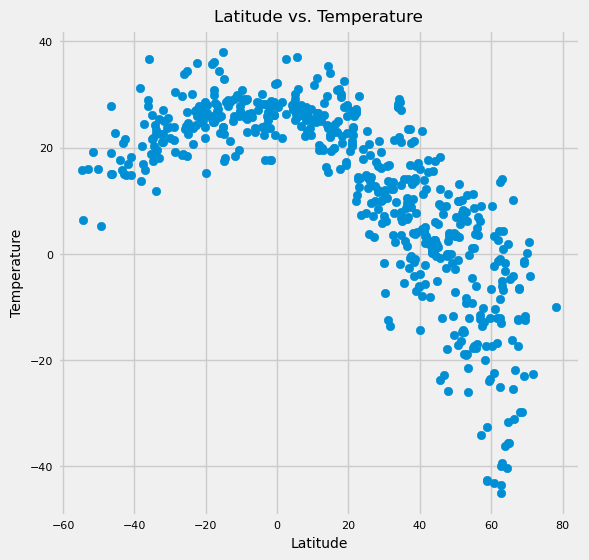

In [23]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter(city_data_df.Lat,city_data_df['Max Temp'], marker='o')
plt.title('Latitude vs. Temperature', fontsize=12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Temperature', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

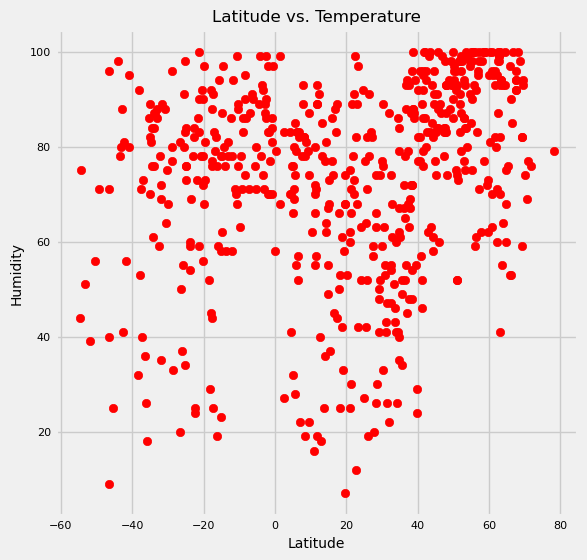

In [25]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter(city_data_df.Lat,city_data_df.Humidity, marker='o', color='red')
plt.title('Latitude vs. Temperature', fontsize=12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

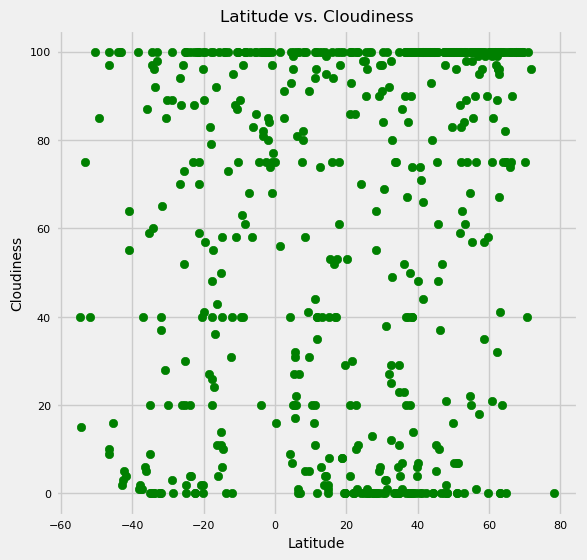

In [26]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter(city_data_df.Lat,city_data_df.Cloudiness, marker='o', color='green')
plt.title('Latitude vs. Cloudiness', fontsize=12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

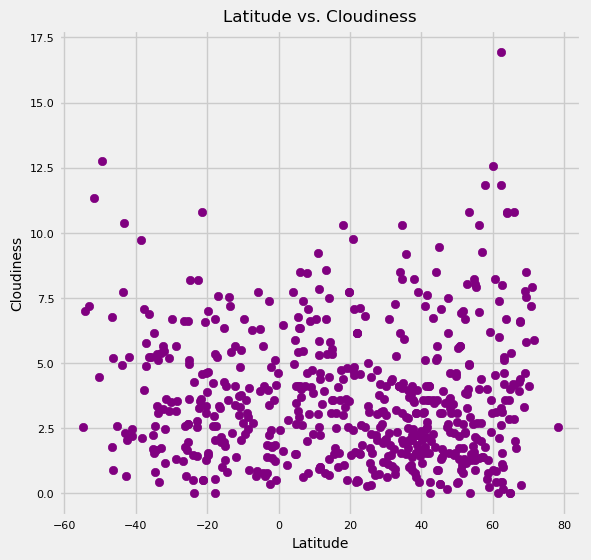

In [28]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.scatter(city_data_df.Lat,city_data_df['Wind Speed'], marker='o', color='purple')
plt.title('Latitude vs. Cloudiness', fontsize=12)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
import scipy.stats as st

def lin_mod(x, y):  
    cor = st.pearsonr(x,y)
    beta1, beta0, r, pval, se = st.linregress(x, y)
    pred = beta1 * x + beta0
    
    #Plot the line
    plt.scatter(x, y ,marker="o", color="red", alpha=0.4, label="Data Points")
    plt.plot(x,pred,"-", color="red", linewidth=1.2, label=f'Best fit line: y={beta1:.2f}x+{beta0:.2f}')
    plt.legend(fontsize=8)
    print(f"The r-value between {x.name} and {y.name} is {round(cor[0],2)}")


In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muchkapskiy,51.8513,42.4717,-14.67,98,59,1.73,RU,1706472395
1,anadyr,64.7500,177.4833,-31.72,75,0,4.00,RU,1706472396
3,hotan,37.0997,79.9269,-2.68,45,100,1.11,CN,1706472396
4,vorgashor,67.5833,63.9500,-12.43,92,100,4.41,RU,1706472396
5,sandnessjoen,66.0217,12.6316,10.06,53,75,10.80,NO,1706472396


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,11.86,84,96,3.36,AU,1706472128
7,port elizabeth,-33.9180,25.5701,23.39,76,0,5.14,ZA,1706472301
8,port-aux-francais,-49.3500,70.2167,5.21,71,85,12.75,TF,1706472397
9,grytviken,-54.2811,-36.5092,6.36,75,15,7.00,GS,1706472397
10,ushuaia,-54.8000,-68.3000,15.81,44,40,2.57,AR,1706472250


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.8


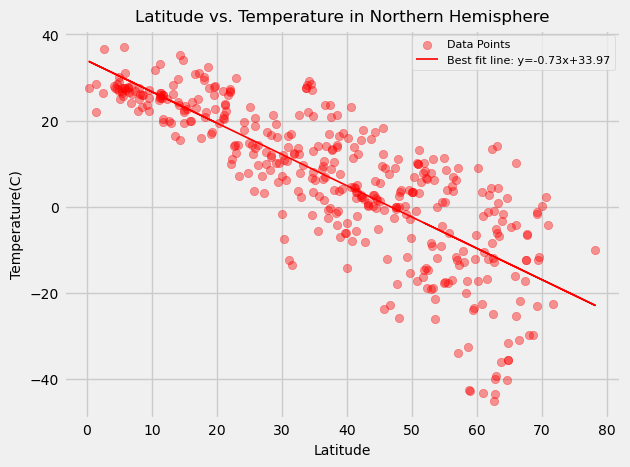

In [79]:
# Linear regression on Northern Hemisphere
lin_mod(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Temperature(C)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Temperature in Northern Hemisphere', fontsize=12)
plt.show()

The r-value between Lat and Max Temp is 0.5


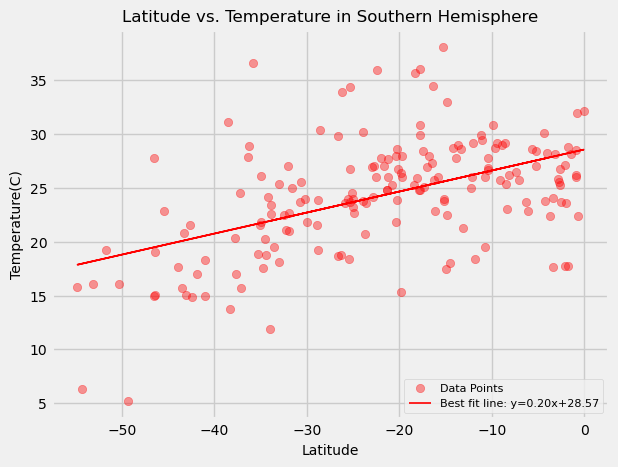

In [80]:
# Linear regression on Southern Hemisphere
lin_mod(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Temperature(C)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Temperature in Southern Hemisphere', fontsize=12)
plt.show()

**Discussion about the linear relationship:** 
From the plots above, there was a negative correlation between latitude and temperature, which suggests that cities with higher latitudes seem to have lower temperattures. Wheras, in the case of Southern hemisphere, there seems to be a positive correlation between latitude and temperature, indicating that the higher latitude of the city, the higher temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.42


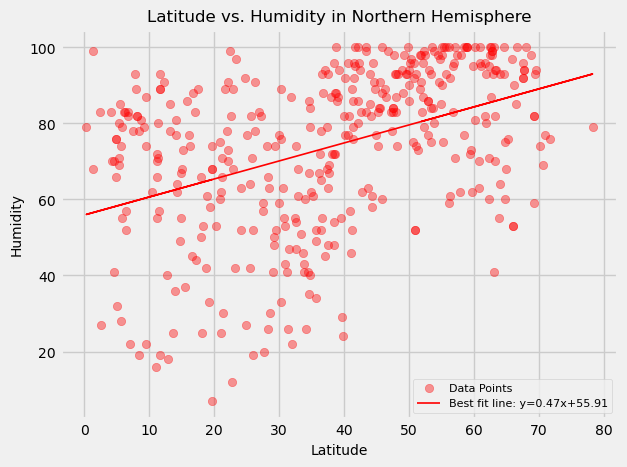

In [81]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
lin_mod(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Humidity in Northern Hemisphere', fontsize=12)
plt.show()

The r-value between Lat and Humidity is 0.31


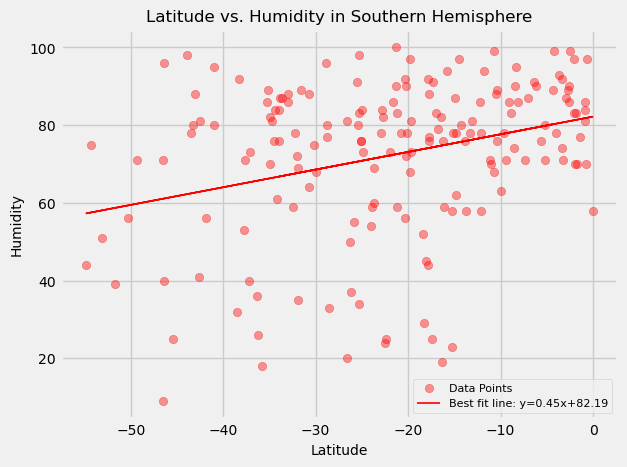

In [82]:
# Southern Hemisphere
lin_mod(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Humidity in Southern Hemisphere', fontsize=12)
plt.show()

**Discussion about the linear relationship:** Given the plots above, there seems to be a weak positive correlation between latitude and humidity in both Northern and Southern hemispheres. Specifically, as the latitude increases, the city's humidity level is likely to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.3


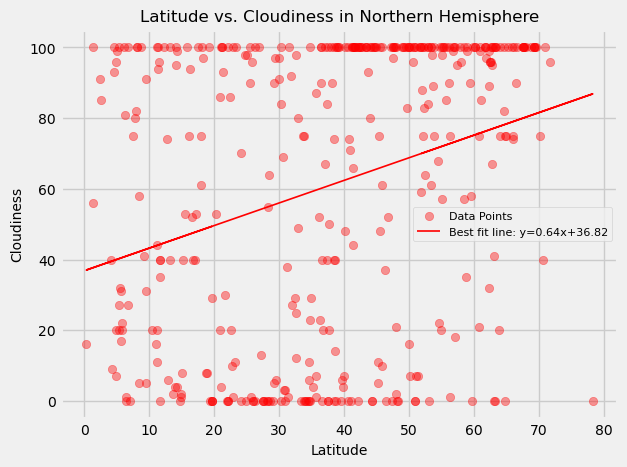

In [83]:
# Northern Hemisphere
lin_mod(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Cloudiness in Northern Hemisphere', fontsize=12)
plt.show()

The r-value between Lat and Cloudiness is 0.32


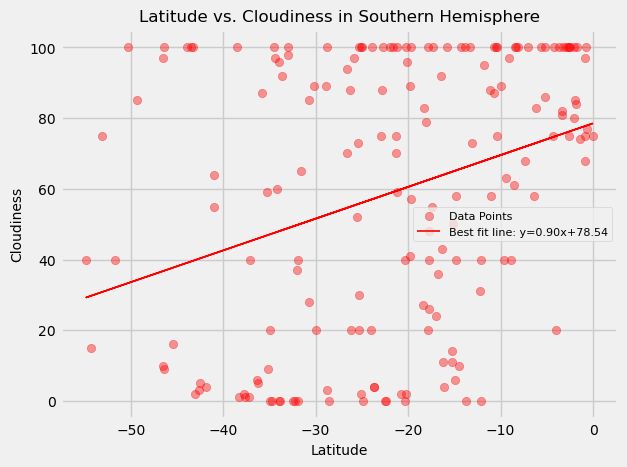

In [84]:
# Southern Hemisphere
lin_mod(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Cloudiness in Southern Hemisphere', fontsize=12)
plt.show()

**Discussion about the linear relationship:** From the plots above, there seems to be a positive correlation between latitude and cloudiness in both Northern and Southern hemispheres, which suggests that as the latitude increases, the levels of city's cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.03


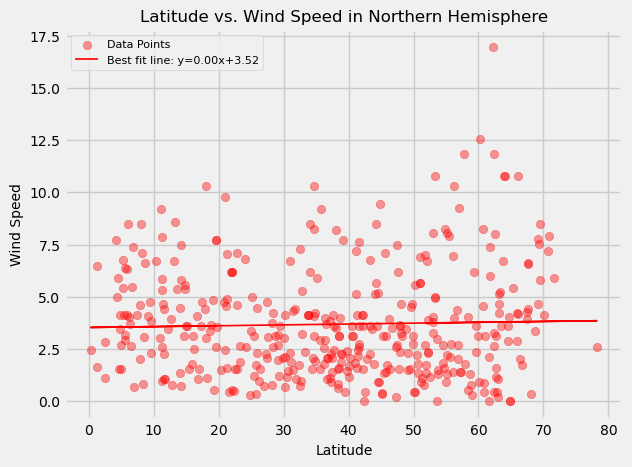

In [85]:
# Northern Hemisphere
lin_mod(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Wind Speed in Northern Hemisphere', fontsize=12)
plt.show()

The r-value between Lat and Wind Speed is -0.24


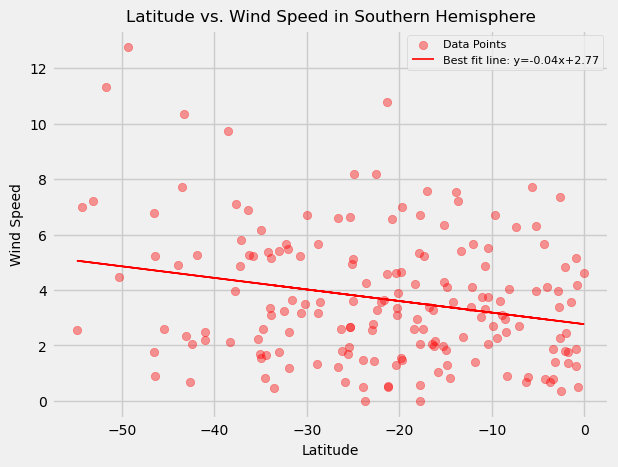

In [86]:
# Southern Hemisphere
lin_mod(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Latitude vs. Wind Speed in Southern Hemisphere', fontsize=12)
plt.show()

**Discussion about the linear relationship:** From the plots above, there seems to be a weak negative correlation between latitude and wind speed in Southern hemisphere, which shows that as the latitude increases, the wind speed decreases. Whereas, in the case of Northern hemisphere, latitude and wind speed seem to be not related to each other.